# 簡單線性回歸導論

在這個非常簡單的例子中，我們將探討如何創建一條非常簡單的擬合線，典型的案例是 y=mx+b 形式。我們將仔細地逐步進行，讓您了解一條簡單的擬合線能回答什麼類型的問題。請記住，這個案例非常簡化，並不是我們稍後將採用的方法，它僅僅是為了讓您開始思考線性回歸，

簡單線性回歸的核心公式是找到最佳擬合直線，即所謂的回歸線，其公式可以表示為：

$ y = \beta_0 + \beta_1 x $

其中：
- $ y $ 是應變量（依賴變量）。
- $ x $ 是自變量（獨立變量）。
- $ \beta_0 $ 是截距，即直線在 $ y $ 軸的交點。
- $ \beta_1 $ 是斜率，表示 $ x $ 變動一單位時 $ y $ 的變動量。

### 參數估計
使用最小二乘法來估計 $ \beta_0 $ 和 $ \beta_1 $，計算公式如下：

$ \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $

$ \beta_0 = \bar{y} - \beta_1 \bar{x} $

其中：
- $ \bar{x} $ 和 $ \bar{y} $ 分別是 $ x $ 和 $ y $ 的平均值。
- $ n $ 是數據點的數量。

### 計算範例
假設我們有以下的數據點：

| $ x $ (年經驗) | $ y $ (年薪，單位：萬元) |
|---------|------------------|
| 1       | 3                |
| 2       | 4                |
| 3       | 5                |
| 4       | 6                |

我們要找到這些數據的線性回歸方程。首先計算 $ x $ 和 $ y $ 的平均值：

$[\bar{x} = \frac{1 + 2 + 3 + 4}{4} = 2.5]$

$ \bar{y} = \frac{3 + 4 + 5 + 6}{4} = 4.5 $

接下來計算斜率 $ \beta_1 $：

$ \beta_1 = \frac{(1-2.5)(3-4.5) + (2-2.5)(4-4.5) + (3-2.5)(5-4.5) + (4-2.5)(6-4.5)}{(1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2} = \frac{(-1.5)(-1.5) + (-0.5)(-0.5) + (0.5)(0.5) + (1.5)(1.5)}{2.5} = 1 $

計算截距 $ \beta_0 $：

$ \beta_0 = 4.5 - 1 \times 2.5 = 2 $

因此，回歸方程為：

$ y = 2 + 1x $

或簡化為：

$ y = 2 + x $

這樣，給定任何 $ x $ 的值，我們都可以使用這個方程來預測 $ y $ 的值。例如，若一人具有 5 年的經驗，其年薪預估為：

$ y = 2 + 5 = 7 $（單位：萬元）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 樣本數據

這份樣本數據來自於 ISLR。它展示了某一產品的銷售量（以千單位計）與廣告預算（以千美元計）之間的關係，涵蓋了電視、廣播和報紙媒體。

In [2]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df["total_spend"] = df["TV"] + df["radio"] +df["newspaper"]


<Axes: xlabel='total_spend', ylabel='sales'>

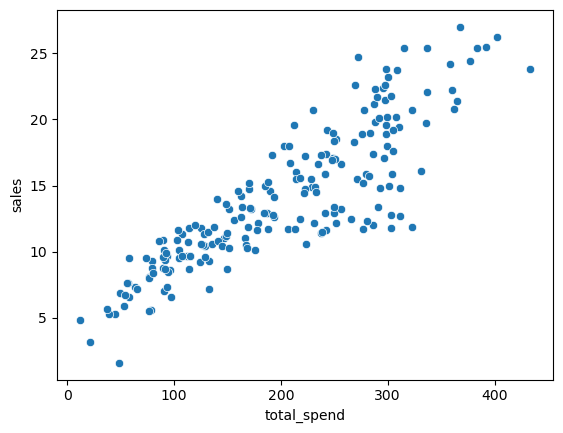

In [8]:
sns.scatterplot(x="total_spend",y="sales",data=df)

<Axes: xlabel='total_spend', ylabel='sales'>

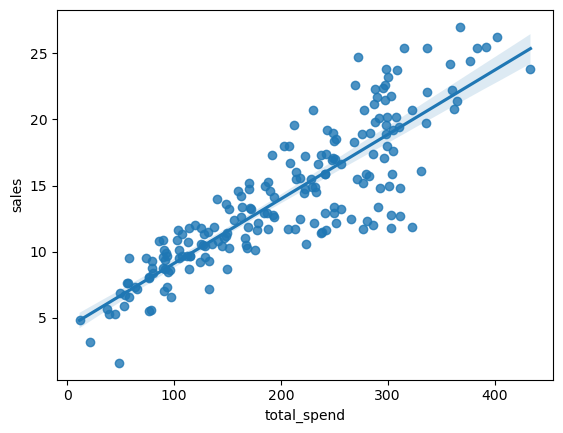

In [6]:
sns.regplot(x="total_spend",y="sales",data=df)

## 套用公式


簡單線性回歸的核心公式是找到最佳擬合直線，即所謂的回歸線，其公式可以表示為：

$ y = \beta_0 + \beta_1 x $

其中：
- $ y $ 是應變量（依賴變量）。
- $ x $ 是自變量（獨立變量）。
- $ \beta_0 $ 是截距，即直線在 $ y $ 軸的交點。
- $ \beta_1 $ 是斜率，表示 $ x $ 變動一單位時 $ y $ 的變動量。

### 參數估計
使用最小二乘法來估計 $ \beta_0 $ 和 $ \beta_1 $，計算公式如下：

$ \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $

$ \beta_0 = \bar{y} - \beta_1 \bar{x} $

其中：
- $ \bar{x} $ 和 $ \bar{y} $ 分別是 $ x $ 和 $ y $ 的平均值。
- $ n $ 是數據點的數量。

In [ ]:
x = df["total_spend"]
y = df["sales"]
x_mean = np.mean(x)
y_mean = np.mean(y) 
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)** 2)
beta_0 = y_mean- beta_1 * x_mean
print(  beta_0,beta_1)


4.243028216036327 0.04868787931904816


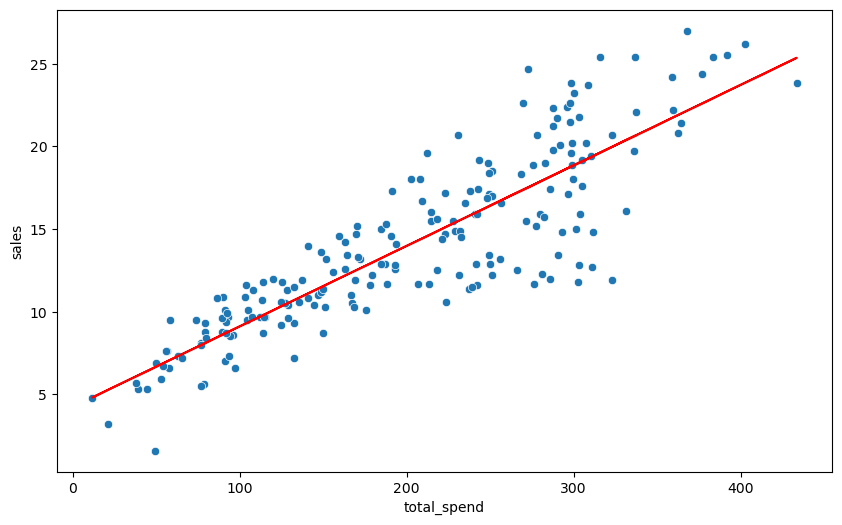

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="total_spend",y="sales",data=df)
plt.plot(x,beta_0+beta_1*x,c="red")
plt.show()

In [21]:
beta_1,beta_0 = np.polyfit(x,y,1)
print(beta_0,beta_1)

4.243028216036326 0.04868787931904817


In [22]:
predicted_spend = np.linspace(0,500,100)
predicted_sales  = beta_0 + beta_1 * predicted_spend


$ y = \beta_0 + \beta_1 x $


<Axes: xlabel='total_spend', ylabel='sales'>

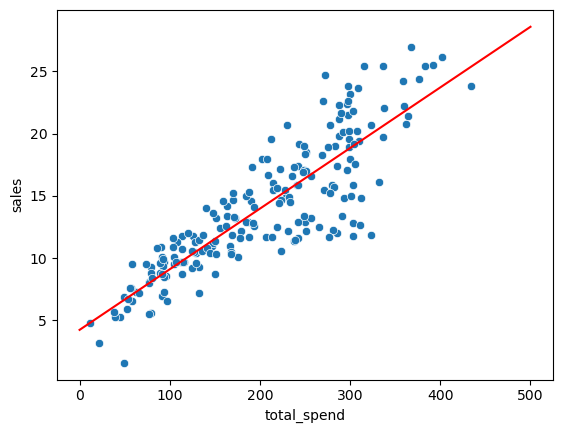

In [23]:
plt.plot(predicted_spend,predicted_sales,c="red")
sns.scatterplot(x="total_spend",y="sales",data=df)

In [ ]:
sepnd = 200
predicted_sales = beta_0  + sepnd * beta_1 
print(predicted_sales)

13.98060407984596


In [28]:
b0,b1,b2,b3 = np.polyfit(x,y,3)
print(b0,b1,b2,b3)

3.0761503304797296e-07 -0.0001893924493476223 0.08208863023067495 2.704950525950056


In [29]:
potential_spend = np.linspace(0,500,100)
predicted_sales =  b0* potential_spend ** 3 + b1 * potential_spend ** 2 + b2 * potential_spend + b3


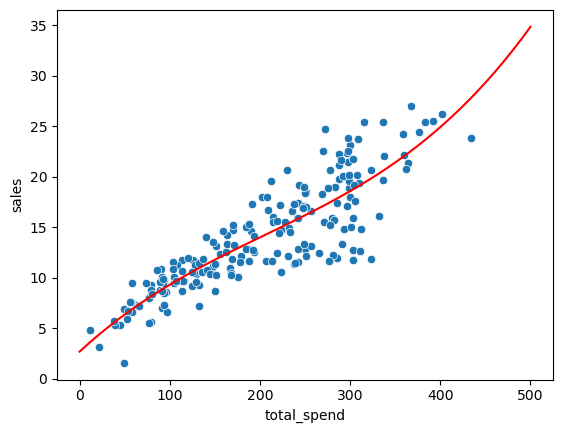

In [32]:
sns.scatterplot(x="total_spend",y="sales",data=df)
plt.plot(potential_spend,predicted_sales,c="red")

In [33]:
import numpy as np

In [34]:
year=[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020]
pop=[2.53, 2.57, 2.62, 2.67, 2.71, 2.76, 2.81, 2.86, 2.92, 2.97, 3.03,
       3.08, 3.14, 3.2 , 3.26, 3.33, 3.4 , 3.47, 3.54, 3.62, 3.69, 3.77,
       3.84, 3.92, 4.  , 4.07, 4.15, 4.22, 4.3 , 4.37, 4.45, 4.53, 4.61,
       4.69, 4.78, 4.86, 4.95, 5.05, 5.14, 5.23, 5.32, 5.41, 5.49, 5.58,
       5.66, 5.74, 5.82, 5.9 , 5.98, 6.05, 6.13, 6.2 , 6.28, 6.36, 6.44,
       6.51, 6.59, 6.67, 6.75, 6.83, 6.92, 7.  , 7.08, 7.16, 7.24, 7.32,
       7.4 , 7.48, 7.56, 7.64, 7.72]


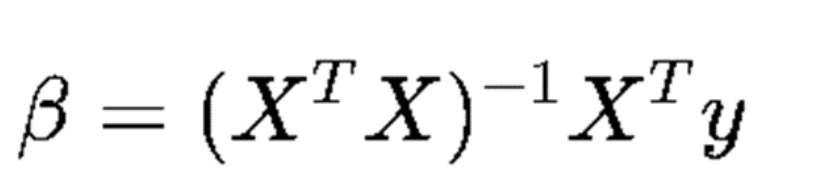

$ y = \beta_0 + \beta_1 x $


w[0,0] = β₁（斜率），

w[1,0] = β₀（截距）。

In [43]:
X = np.array(year).reshape(-1,1)
y = np.array(pop).reshape(-1,1)
print(X.shape,y.shape)


(71, 1) (71, 1)


In [44]:
one = np.ones((X.shape[0],1))
#print(one)
X = np.concatenate((X,one),axis=1)
X.shape

(71, 2)

In [45]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[ 7.72102616e-02],
       [-1.48313919e+02]])

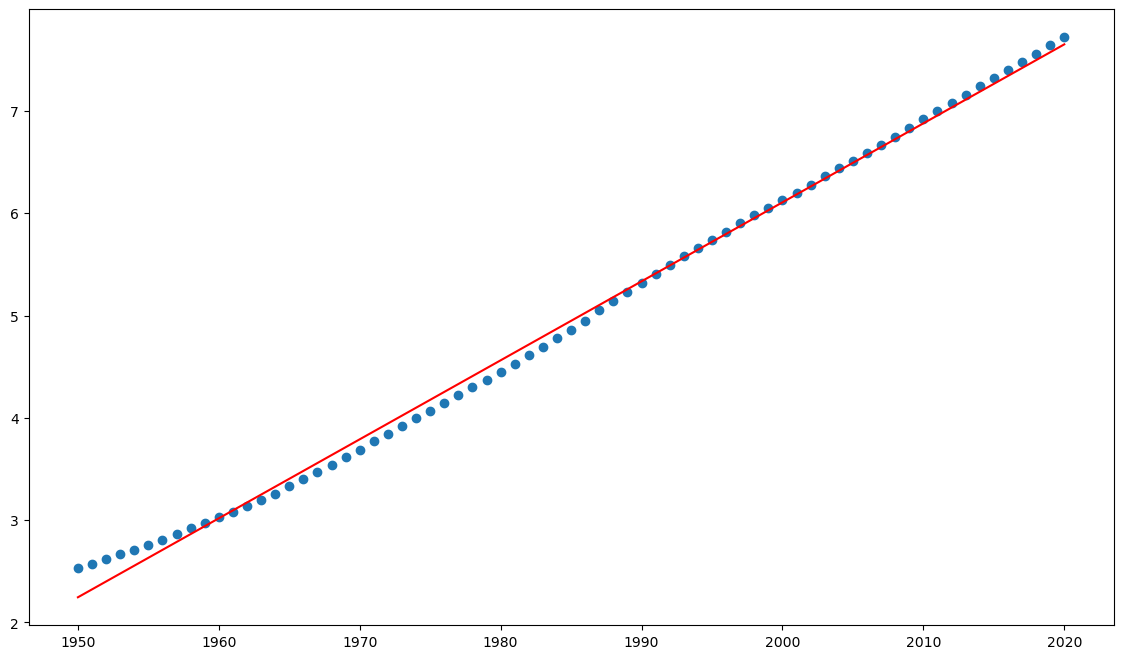

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],y[:,0])
plt.plot(X[:,0],X[:,0] * w[0,0] + w[1,0],"r")
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = np.array(year).reshape(-1,1)
y = np.array(pop)
model.fit(X,y)
print(model.coef_,model.intercept_)

[0.07721026] -148.31391851106642


In [57]:
## 請問2050、2060年世界人口數=?
print(f"{(2050 * model.coef_[0] + model.intercept_) * 10000000000} ")
print(f"{(2060 * model.coef_[0] + model.intercept_) * 10000000000} ")

99671177062.37445 
107392203219.31612 


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 擴展問題

之前，我們探討了**總廣告支出與銷售之間是否存在關聯？**以及預測某一總支出值的總銷售量。現在我們想進一步探討**每個廣告渠道（電視、廣播、報紙）與銷售之間的關係是什麼？**

Text(0.5, 1.0, 'NewSpaper Spend')

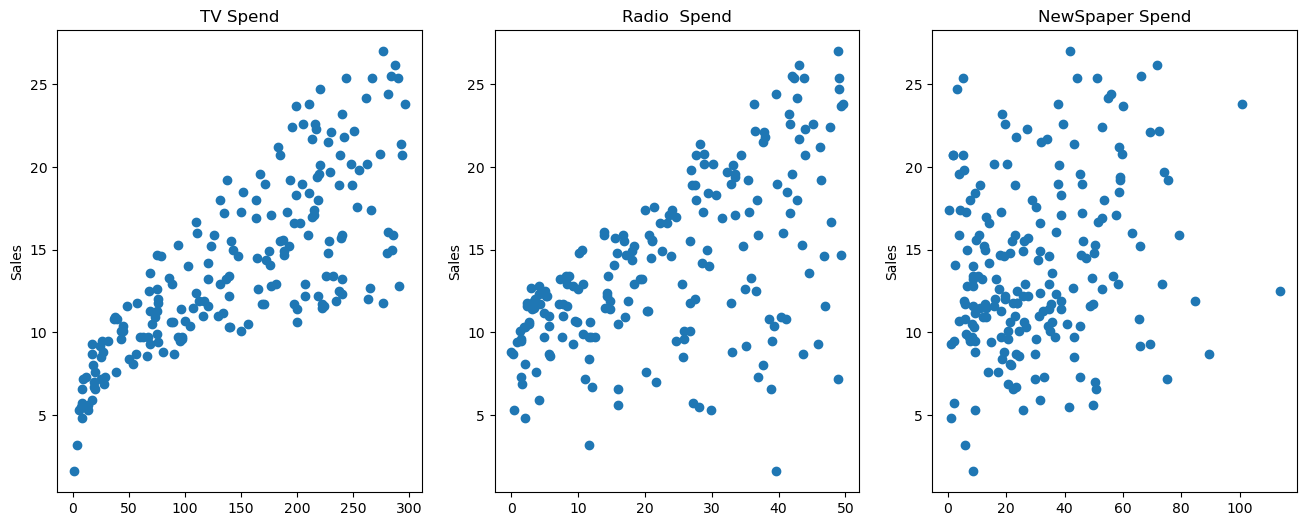

In [61]:
fig,axes  = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df["TV"],df["sales"],"o")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"],df["sales"],"o")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio  Spend")


axes[2].plot(df["newspaper"],df["sales"],"o")
axes[2].set_ylabel("Sales")
axes[2].set_title("NewSpaper Spend")

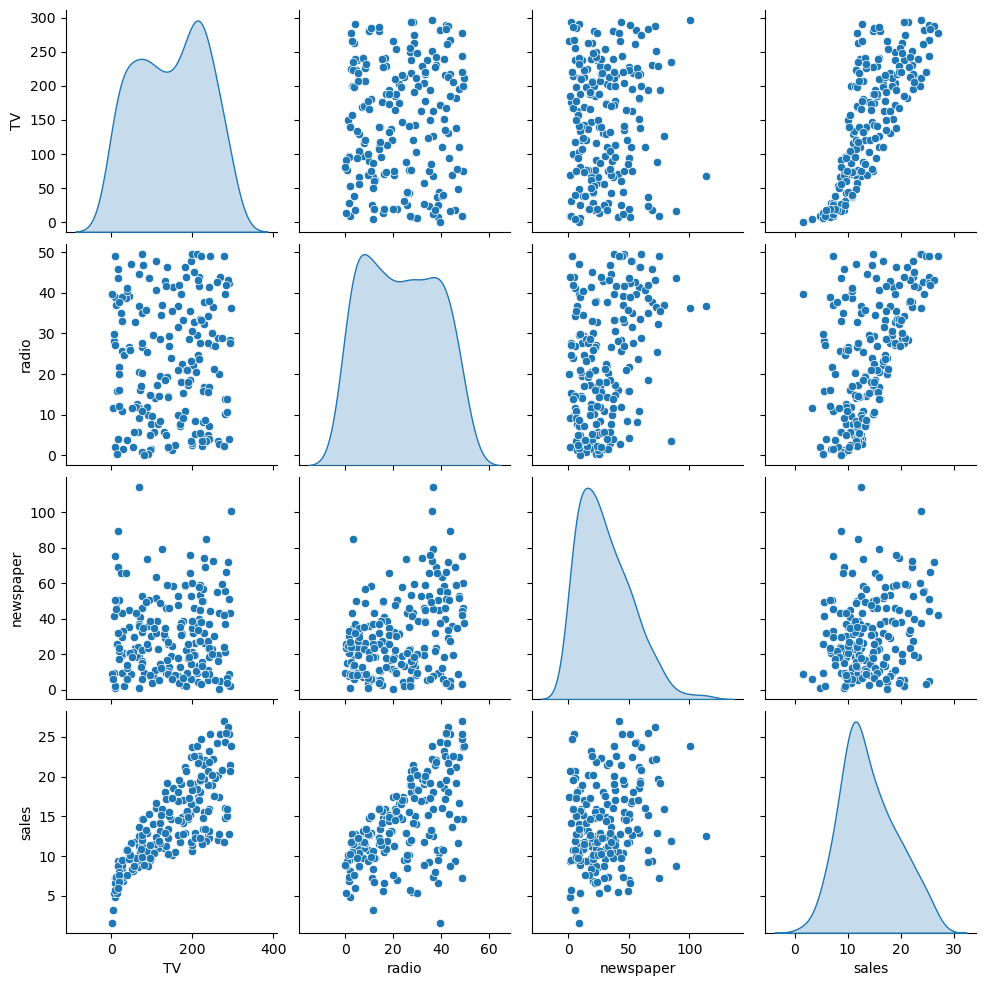

In [ ]:
sns.pairplot(df,diag_kind="kde")#"kde"：在對角線上畫 核密度估計圖 (Kernel Density Estimation)

In [63]:
X = df.drop("sales",axis=1)
y = df["sales"]



In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [66]:
test_pred = model.predict(X_test)

### 1. 均方誤差（MSE, Mean Squared Error）
MSE 是所有預測值和實際值之間差異的平方和的平均值。公式如下：

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

其中：
- $( n )$ 是樣本數
- $( y_i )$ 是實際值
- $( \hat{y}_i )$ 是預測值

### 2. 均方根誤差（RMSE, Root Mean Squared Error）
RMSE 是 MSE 的平方根。公式如下：

$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$

### 3. 平均絕對誤差（MAE, Mean Absolute Error）
MAE 是所有預測值和實際值之間差異的絕對值的平均值。公式如下：

$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,test_pred)
mae = mean_absolute_error(y_test,test_pred) 
print(f"MSE:{mse}\nMAE:{mae}")

MSE:2.2987166978863782
MAE:1.2137457736144803


In [68]:
#拿訓練的資料做一下預測
test_pred = model.predict(X_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_train,test_pred)
mae = mean_absolute_error(y_train,test_pred)

print(mse,mae)

3.0088167761579943 1.252446303416864


# Polynomial Regression with SciKit-Learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [73]:
X = df.drop("sales",axis=1)
y = df["sales"]

print(X.shape)

(200, 3)


## Polynomial Regression
$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_1^2 +  \ldots + \beta_dx_1^d + \epsilon$$

接著我們可以對這些新生成的多項式特徵進行線性回歸，因為實際上，我們只是將這些新的多項式特徵 $(x^2, x^3, \ldots, x^d) $ 當作新的特徵來處理。顯然，我們需要謹慎選擇正確的多項式度數 \(d\)（模型的度數），測試集上的指標結果將幫助我們確定這一點！

這種方法可以幫助我們擴展模型的表達能力，捕捉到數據中的非線性關係，從而提高模型的預測精度。

當使用 `PolynomialFeatures` 模塊時，如果將參數 `degree=2` 與 `include_bias=False` 設定，表示我們想生成二次多項式特徵，但不包括常數項（也就是截距項）。下面將用 LaTeX 格式詳細說明這一轉換過程：

### 原始特徵


$ \text{假設我們的原始特徵為}X=[x_1,x_2,x_3],$

### 二次多項式特徵

這會生成所有一次項、二次項及交互項的特徵。具體包括：

1.原始特徵的一次項：

$x_1,x_2,x_3$


2. 原始特徵的二次項：
$$x_1^2,x_2^2,x_3^2$$
### 3.原始特徵之間的交互項：
$$x_1x_2,x_1x_3,x_2x_3$$

因此，生成的二次多項式特徵可以表示為：

$X_{\mathrm{poly}}=[x_1,x_2,x_3,x_1^2,x_2^2,x_3^2,x_1x_2,x_1x_3,x_2x_3]$

### 具體公式

若用$\beta$表示回歸係數·用$\epsilon$表示誤差項·則二次多項式回歸模型可以表示為：
$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1^2+\beta_5x_2^2+\beta_6x_3^2+\beta_7x_1x_2+\beta_8x_1x_3+\beta_9x_2x_3+\epsilon $$

由於設置了‘include\_bias=False’,這裡不包括常數項( $\beta_0$ )·因此實際的公式為：
$$\hat{y}=\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1^2+\beta_5x_2^2+\beta_6x_3^2+\beta_7x_1x_2+\beta_8x_1x_3+\beta_9x_2x_3+\epsilon $$



In [72]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
#是否包含一個常數項（也稱為偏差項或截距項，通常為 1）在生成的多項式特徵中
#include_bias 是否需要算偏差值
#include_bias=False 因為LinearRegression 會算偏差值。



In [74]:
pol_features = polynomial_converter.fit_transform(X)
pol_features.shape

(200, 9)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(pol_features,y,test_size=0.3,random_state=101)

In [76]:
pol_features[0][:3]

array([230.1,  37.8,  69.2])

In [77]:
pol_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [78]:
pol_features[0][:3] ** 2

array([52946.01,  1428.84,  4788.64])

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
test_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
print(f"MSE:{MSE}\nMAE:{MAE}")

MSE:0.44175055104035904
MAE:0.48967980448037096
